## A3 ENTRENAMIENTO DE UNA RED NEURONAL SIMPLE
### Nombre: **Diego Armando Trejo Piña**
### Matricula: **1903825**
### Clase: **L-M-V a N1**

***Para comenzar con nuestra Red Neuronal Simple, comenzamos importando las librerias que vamos a utilizar***

In [127]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

from keras.api._v2.keras import datasets

***Ahora importamos el set de datos MNIST, una guia que contiene imagenes de digitos escrito a mano, 0, 1, 2, etc.***

In [128]:
mnist = keras.datasets.mnist 
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()


***Exploramos y pre-procesamos el set de datos***

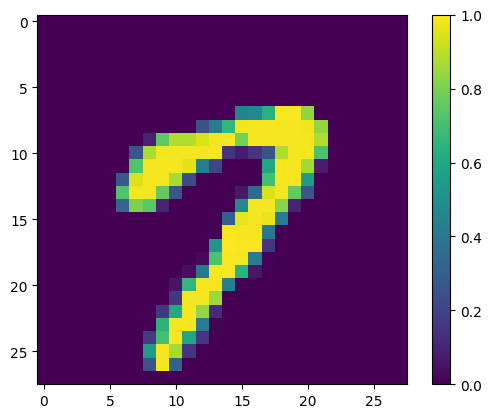

In [133]:
class_name = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']
#Explore el formato de el set de datos antes de entrenar el modelo
train_images.shape
len(train_labels)
train_labels
test_images.shape
len(test_labels)

#El set de datos debe ser pre-procesada antes de entrenar la red.
plt.figure()
plt.imshow(train_images[15])
plt.colorbar()
plt.grid(False)
plt.show()

In [134]:
# Se dividimos los valores por 255 para escalar los estos valores en un rango de 0 a 1 antes de introducirlos al modelo de nuestra Red Neuronal

train_images = train_images / 255.0
test_images = test_images / 255.0

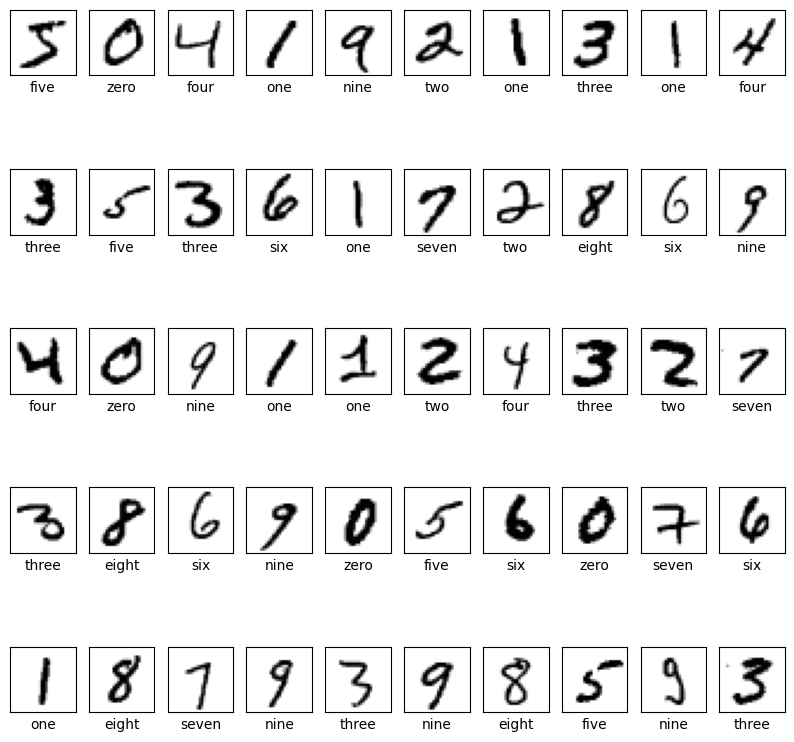

In [218]:
# Vamos a desplegar las primeras 50 imagenes para poder verificar que el set de datos esta en el formato adecuado y que estan listos para construir y entrenar la red

plt.figure(figsize=(10,10))
for i in range(50):
  plt.subplot(5,10,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_name[train_labels[i]])
plt.show()

***Configuramos las capas el modelo para posteriormente poder compilarlo***

In [219]:
# Configuramos las capas 
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compilamos el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenamos al modelo
model.fit(train_images, train_labels, epochs=9)

Epoch 1/9
1875/1875 [==============================] - 8s 4ms/step - loss: 1.1363 - accuracy: 0.7231
Epoch 2/9
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4725 - accuracy: 0.8770
Epoch 3/9
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3764 - accuracy: 0.8961
Epoch 4/9
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3371 - accuracy: 0.9049
Epoch 5/9
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3149 - accuracy: 0.9095
Epoch 6/9
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2992 - accuracy: 0.9141
Epoch 7/9
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2867 - accuracy: 0.9175
Epoch 8/9
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2757 - accuracy: 0.9201
Epoch 9/9
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2657 - accuracy: 0.9227


In [220]:
#Se evalua la exactitud del set de datos.
test_loss, test_acc=model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

#En este caso la exactitud del set del datos es ligeramente mayor (0.0017 mayor) que la exactitud sobre el set de entrenamiento. 
#Esta diferencia entre el entrenammiento y el test se debe a un underfitting.

313/313 - 1s - loss: 0.2561 - accuracy: 0.9244 - 832ms/epoch - 3ms/step

Test accuracy: 0.9243999719619751


***Se hacen las predicciones***

In [221]:
predictions = model.predict(test_images)
predictions[8]


313/313 [==============================] - 1s 2ms/step


array([5.9178588e-04, 1.8209381e-07, 5.0157489e-04, 6.7105077e-08,
       2.2525666e-02, 3.8870589e-03, 9.7174114e-01, 1.1416503e-07,
       6.8305351e-04, 6.9322072e-05], dtype=float32)

In [224]:
#Una prediccion es un arreglo de 10 numeros. Estos representan el nivel de "confianza" del modelo sobre las imagenes

np.argmax(predictions[0])
test_labels[0]

7

In [195]:
#Graficamos para poder ver todo el set de predicciones de las 10 clases
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img,cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'green'
  else:
    color = 'orange'

  plt.xlabel("{} {:2.0f}% ({})".format(class_name[predicted_label],
                                       100*np.max(predictions_array),
                                        class_name[true_label]),
             color=color)
  def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#33333")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('orange')
    thisplot[true_label].set_color('green')

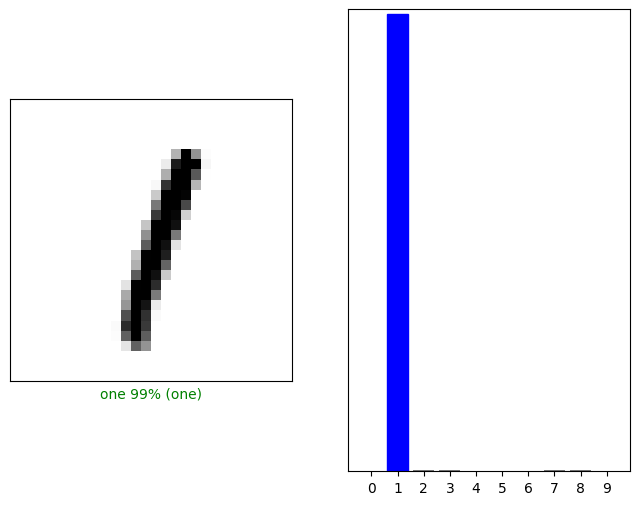

In [228]:
#Miremos la imagen [5], sus predicciones y el arreglo de predicciones. 
#Las etiquetas de prediccion correctas estan en azul y las incorrectas estan en rojo. 
#El numero entrega el porcentaje (sobre 100) para la etiqueta predecida.

i = 5
plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

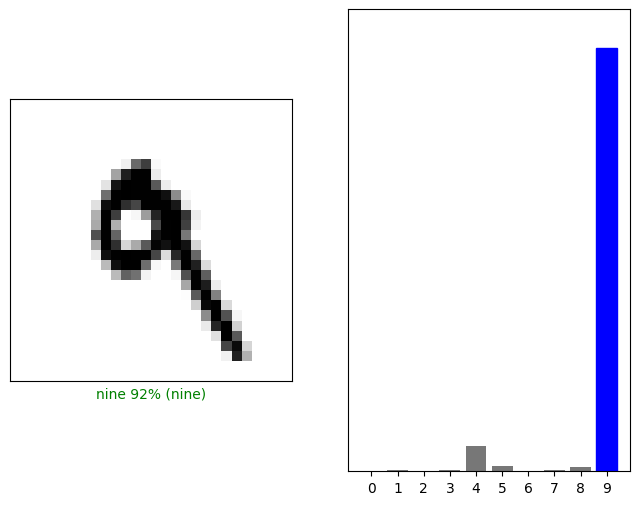

In [232]:
#Ahora hacemos lo mismo pero con la imagen numero 7
i = 7
plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

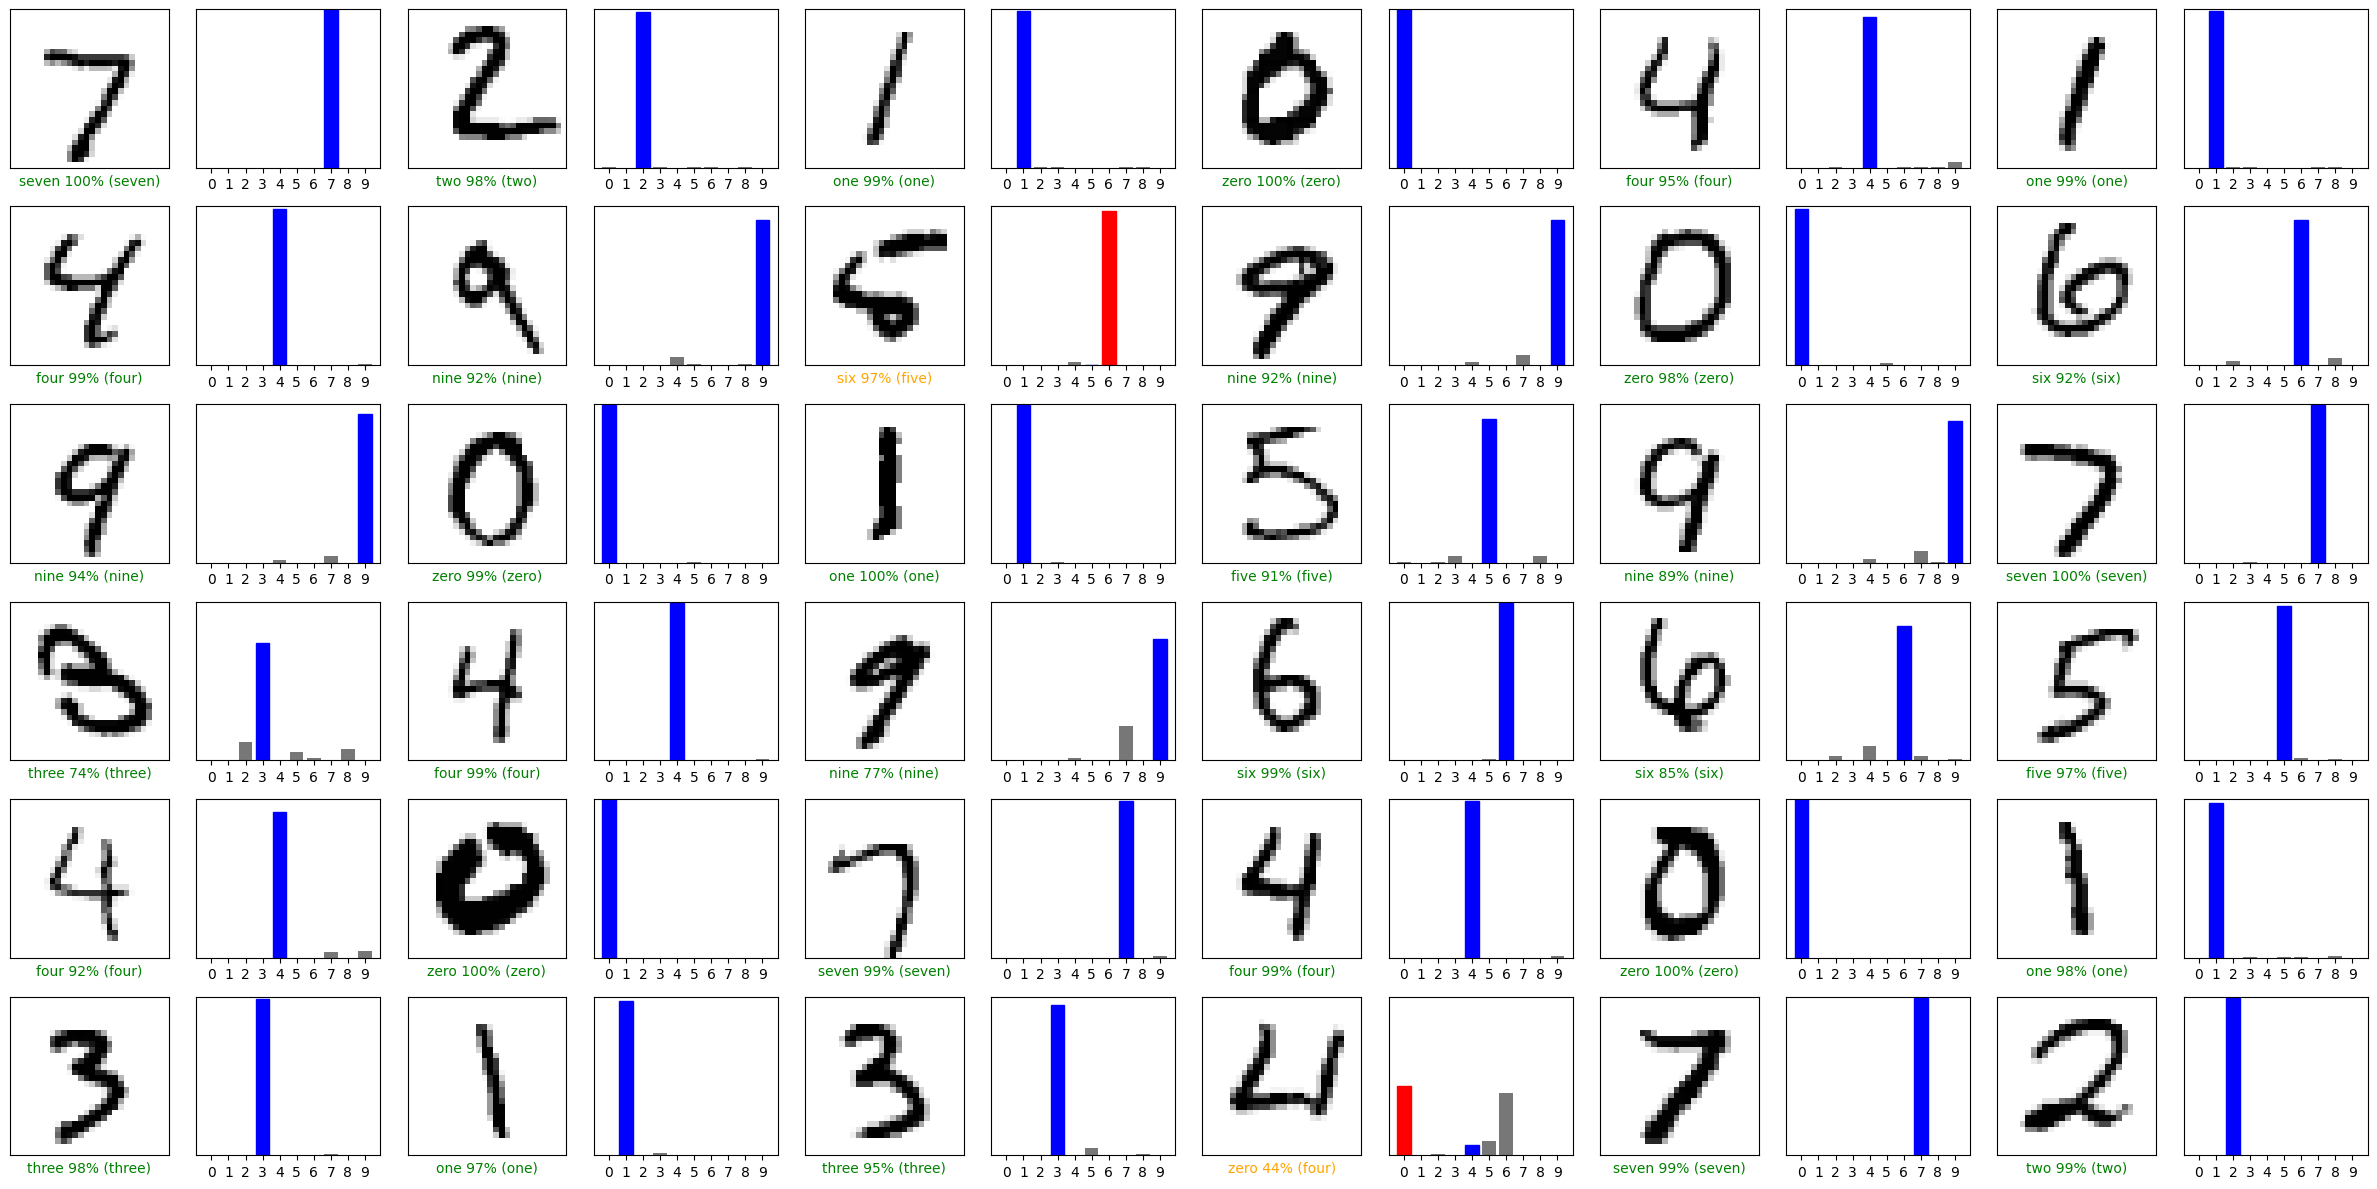

In [236]:
#Vamos a graficar multiples imagenes con sus predicciones. Vemos como el modelo puede estar equivocado aun cuando tiene mucha confianza.
num_rows = 6
num_cols = 6
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

***Para terminar, hacemos una predicción con una unica imagen con nuestro modelo ya entrenado***

In [235]:
# Tomamos una imagen del conjunto de datos de prueba.
img = test_images[1]
print(img.shape)

img = (np.expand_dims(img,0))
print(img.shape)

(28, 28)
(1, 28, 28)


1/1 [==============================] - 0s 24ms/step
[[2.0935067e-03 2.2043429e-05 9.8234689e-01 5.2448618e-03 2.1697649e-10
  3.8627277e-03 4.0704971e-03 7.2304704e-11 2.3595579e-03 3.2122831e-09]]


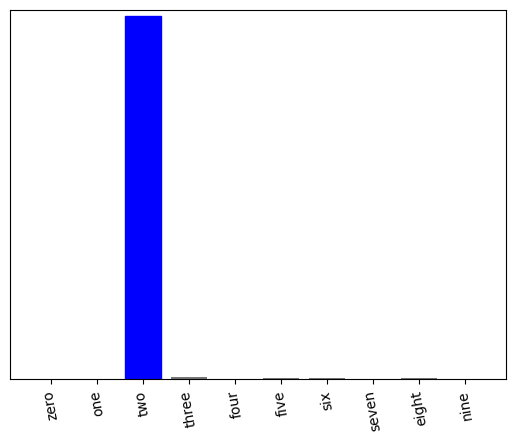

In [233]:
predictions_single = model.predict(img)

print(predictions_single)

plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_name, rotation=100)

In [234]:
np.argmax(predictions_single[0])

2

*Y* el modelo predice una etiqueta de 2.